<a href="https://colab.research.google.com/github/droyktton/clases_ME_IB/blob/main/ME_2025_interacciones_expansiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos aproximados para tratar interacciones (continuación)

Habiendo discutido la aproximación de campo medio, ahora vamos a discutir expansiones de baja y alta temperatura, similares a perturbaciones.

## Expansiones

A altas o bajas temperaturas es posible aproximar las funciones de partición con expansiones perturbativas en términos de variables convenientes. Vamos a concentrarnos en particular en las expansiones de $T$ alta.


### Partículas interactuantes, gases no ideales

El más general está dado por

$$H = \sum_{n=1}^N \frac{p_n^2}{2 m} + U({\bf r_1},\dots,{\bf r_N})$$

¿Qué esperan que ocurra a bajas y altas temperaturas?

¿Qué dificultad tiene este problema? Veamos

$$Z = \int \frac{1}{N! h^{3N}} d{\bf r}_1 \dots d{\bf r}_N d{\bf p}_1 \dots d{\bf p}_N \exp \left[-\beta \sum_{n=1}^N \frac{p_n^2}{2 m}\right] \exp \left[-\beta U({\bf r_1},\dots,{\bf r_N}) \right]$$

Recordemos que la funcion de partición del gas ideal tenemos

$$Z_0=\int \frac{1}{N! h^{3N}} d{\bf r}_1 \dots d{\bf r}_N d{\bf p}_1 \dots d{\bf p}_N \exp \left[-\beta \sum_{n=1}^N \frac{p_n^2}{2 m}\right]=(V/\lambda^3)^N/N!$$

donde

$$\lambda = \frac{h}{\sqrt{2\pi m k_B T}}$$

es la longitud de De Broglie térmica $\lambda \approx h/p = h/\sqrt{\langle p^2 \rangle/3}=h/\sqrt{2m \langle p^2/2m \rangle/3}=\hbar/\sqrt{2 m (3/2)k_B T/3}=h/\sqrt{m k_B T}$.

Si multiplicamos y dividimos por $Z_0$ tenemos entonces

$$Z = Z_0 \int \frac{1}{N! h^{3N}} d{\bf r}_1 \dots d{\bf r}_N d{\bf p}_1 \dots d{\bf p}_N \left(\exp \left[-\beta \sum_{n=1}^N \frac{p_n^2}{2 m}\right]/Z_0\right) \exp \left[-\beta U({\bf r_1},\dots,{\bf r_N}) \right]
$$

o sea que

$$Z = Z_0 \int \frac{1}{N! h^{3N}} d{\bf r}_1 \dots d{\bf r}_N d{\bf p}_1 \dots d{\bf p}_N [p_0({\bf r}_1,\dots,{\bf p}_N)] \exp \left[-\beta U({\bf r_1},\dots,{\bf r_N}) \right]$$

o mas conciso

$$Z = Z_0 \langle \exp \left[-\beta U({\bf r_1},\dots,{\bf r_N}) \right] \rangle_0$$

La dificultad esta entonces en hacer ese valor medio.
Tambien podriamos haber integrado en momentos, y nos queda

$$
\boxed{
Z = Z_0 V^{-N} \int \frac{1}{N! h^{3N}} d{\bf r}_1 \dots d{\bf r}_N \exp \left[-\beta U({\bf r_1},\dots,{\bf r_N}) \right]
}
$$

donde nos queda por hacer esa integral multidimensional, que no puede factorizarse en general. Hacerla numéricamente, por ejemplo con el método de trapecios es también muy difícil y costoso, porque hay que evaluar $U$ para cada microestado configuracional de un espacio con volumen $V^N$ (Si $V=L^3$, entonces es un hypercubo $3N$ dimensional). Se puede hacer aproximadamente con Monte Carlo pero para un $N \ll 10^{23}$ claro está.





#### Interacciones de a pares
Sin embargo usualmente las interacciones vienen de a pares y tienen simetria de traslación, con potencial de interaccion $u({\bf r})$. El hamiltoniano es

$$H = \sum_{n=1}^N \frac{p_n^2}{2 m} + \sum_{n<m} u({\bf r_n}-{\bf r_m})$$

y usamos que $\sum_{n<m} \equiv \frac{1}{2} \sum_n \sum_{m \neq n} \equiv \sum_{pares}$, porque hay que sumar una sola interaccion por cada par y no hay que incluir la autointeraccion.

entonces

$$Z = Z_0 V^{-N} \int d{\bf r}_1 \dots d{\bf r}_N \exp \left[-\beta \sum_{n<m} u({\bf r}_n-{\bf r}_m) \right]$$

Sigue siendo muy difícil, porque no es posible factorizar en pares de coordenadas, ya que la misma coordenada aparece en muchos pares. Podemos sin embargo calcular fácilmente correcciones al gas ideal introduciendo

$$\boxed{f_{ij}=e^{-\beta u_{ij}}-1}$$

donde $u_{ij}\equiv u({\bf r}_i-{\bf r}_j)$. Esperamos que $f_{ij}$ sea una cantidad chiquita si la temperatura es alta, es decir si $\beta u_{ij}\ll 1$ $\forall i,j$. Esto nos da la posibilidad de hacer perturbaciones, desarrollando en serie de potencias de $f_{ij}$.

$$Z = Z_0 V^{-N} \int d{\bf r}_1 \dots d{\bf r}_N \prod_{i<j} (1+f_{ij})$$

Veamos que pinta tiene $\prod_{i<j} (1+f_{ij})$, para solamente 4 particulas...

$$\prod_{i=1}^{3}\prod_{j=i+1}^{4} (1+f_{ij})=(1+f_{12})(1+f_{13})(1+f_{14})(1+f_{23})(1+f_{24})(1+f_{34})$$

es claro que va a dar lugar a potencias de $f_{ij}$ que van desde 1 a 4... pero hay un montón de términos!


In [ ]:
#@title función "pequeña" $f_{ij}$ de la expansión
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Lennard-Jones potential function U(r) = 4 * [(1/r)^12 - (1/r)^6]
def lennard_jones_potential(r):
    r6 = (1 / r) ** 6
    r12 = r6 ** 2
    return 4 * (r12 - r6)

# Function to compute exp[-U(r)/T] - 1
def exp_ur_t(r, T):
    U_r = lennard_jones_potential(r)
    return np.exp(-U_r / T) - 1

# Plot function for Lennard-Jones potential and exp[-U(r)/T] - 1
def plot_lj_and_exp(T):
    r = np.linspace(0.9, 3.0, 300)  # Distance range for r
    U_r = lennard_jones_potential(r)
    exp_ur = exp_ur_t(r, T)

    # Create figure
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    # Plot Lennard-Jones potential U(r)
    ax[0].plot(r, U_r, label="Lennard-Jones $U(r)$", color="blue")
    ax[0].set_xlabel("Distance $r$")
    ax[0].set_ylabel("$U(r)$")
    ax[0].set_title("Lennard-Jones Potential")
    ax[0].grid(True)
    ax[0].legend()

    # Plot exp[-U(r)/T] - 1
    ax[1].plot(r, exp_ur, label="$e^{-U(r)/T} - 1$", color="red")
    ax[1].set_xlabel("Distance $r$")
    ax[1].set_ylabel("$f_{ij}=e^{-U(r)/T} - 1$")
    ax[1].set_title(f"Interaction for $T = {T}$")
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Interactive plot with a temperature slider
interact(plot_lj_and_exp, T=FloatSlider(value=1, min=0.1, max=5.0, step=0.1, description="Temperature"));


In [ ]:
#@title ¡Ayudémemosnos con computación simbólica! (y solo para 4 partículas...)
from sympy import *
f12, f13, f14, f23, f24, f34 = symbols('f_{12}, f_{13}, f_{14}, f_{23}, f_{24}, f_{34}')
init_printing(use_unicode=True)

expand((1+f12)*(1+f13)*(1+f14)*(1+f23)*(1+f24)*(1+f34))

Y cada uno de esos términos hay que integrarlos en todas las variables de posición. Parece un quilombo la expresión, pero se puede organizar y entender gráficamente (ver en las notas de D. Zanette)



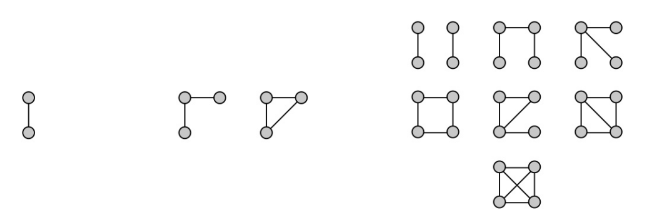

Cada punto representa una partícula. Una partícula aparece asociada a otra (nunca a sí misma) a través de un $f_{ij}$ (la convención es escribir los que $i < j$). Varias partículas forman clusters conectados de distintos tipos a través de esta asociación, como se ve en el dibujo.

*Lo importante es que cada cluster da la misma contribución a $Z$, de modo que es importante saber cuantos hay de cada tipo.*

* *Dos puntos*: el 1 y el 2 por ejemplo, representan un $[f_{12}]$. Hay $N(N-1)/2$ de ellos, por ejemplo $[f_{12}],[f_{13}],\dots,[f_{34}]$,etc, pero todos dan la misma contribución $I$ a la integral porque las variables de integración son mudas, de modo que entre todos dan $N(N-1)I/2$.
* *Tres puntos*: por ejemplo si fijamos los tres índices 1, 2, y 3, tanto cosas del tipo $[f_{12}f_{23}]$ como $[f_{12}f_{23}f_{31}]$ cuentan. Es decir, hay dos tipos de clusters con tres puntos y cada tipo tiene una multiplicidad, pero todos los de un mismo tipo dan la misma contribución a la integral.   
* *Cuatro puntos*: por ejemplo 1,2,3 y 4, pueden aparecer como $[f_{12}f_{34}]$ ("dos pesas"),
$[f_{12}f_{23}f_{34}$ ("techito"), $f_{12}f_{23}f_{24}]$, $[f_{12}f_{23}f_{34}f_{14}]$ ("cuadradito"), $[f_{12}f_{23}f_{31}f_{14}]$ ("cochecito"), $[f_{12}f_{23}f_{34}f_{14}f_{24}]$ ("cuadradito cruzado"),
$[f_{12}f_{23}f_{34}f_{14}f_{24}f_{13}]$ ("cuadradito tachado"). De nuevo, para cada tipo de cluster hay una degeneración que vale la pena calcular para multiplicarla por la contribución única de ese tipo de cluster.
* Etcetera.

El cálculo de la multiplicidad de cada tipo de cluster de $l$ puntos es un problema combinatorio complicado, pero ya se conoce la solución analítica.

---
Para ver como funciona hagamos los siguientes *ejercicios*

  * Cluster "o-o" ("la pesa"): es del tipo de $f_{ij}$ y hay entonces $N(N-1)/2=6$ pares

  $$V^{-N}Z_0 \int d{\bf r}_1\dots d{\bf r}_4  
  (f_{12}+f_{13}+f_{14}+f_{23}+f_{24}+f_{34})
  = 6 V^{-N}Z_0 \int d{\bf r}_1\dots d{\bf r}_4 f_{12}
  = 6 V^{-N+2}Z_0 \left( \int d{\bf r}_1 d{\bf r}_2 f_{12}\right)
  $$


  * Cluster "o-o o-o" ("dos pesas"): es del tipo $f_{ij}f_{lm}$ con todos los índices distintos, por ejemplo $f_{12}f_{34}$. Esto da una contribución

  $$V^{-N}Z_0 \int d{\bf r}_1\dots d{\bf r}_4
  (f_{12}f_{34}+f_{13}f_{24}+f_{14}f_{23})
  = 3 V^{-N+2}Z_0
  \left( \int d{\bf r}_1 d{\bf r}_2 f_{12} \right)^2
  $$

  Si usamos que elegir al primer par, "12", queda determinado univocamente el segundo "34", debería ser $\binom{N=4}{2}=6$, no 3... ¿Cual es el error en el razonamiento? (pista, $f_{12}f_{34}=f_{34}f_{12}$, es el mismo término).

  * Cluster "o-o-o-o" ("el techito"): El siguiente tiene $f_{ij}f_{jk}f_{kl}$, por ejemplo $f_{12}f_{23}f_{34}$.

  $$V^{-N}Z_0 \int d{\bf r}_1\dots d{\bf r}_4
  (
  f_{12}f_{23}f_{34}+f_{13}f_{32}f_{24}+f_{14}f_{42}f_{23}+
  f_{12}f_{24}f_{43}+f_{13}f_{34}f_{42}+f_{14}f_{43}f_{32}+
  f_{23}f_{34}f_{41}+f_{24}f_{43}f_{31}+
  f_{23}f_{31}f_{14}+f_{24}f_{41}f_{13}
  \dots
  )
  = 24 V^{-N}Z_0
  \left( \int d{\bf r}_1 d{\bf r}_2 d{\bf r}_3 d{\bf r}_4 f_{12}f_{23}f_{34} \right)
  $$

  Hay $24$ términos, porque $f_{ij}f_{jk}f_{kl}$ tiene $4$ opciones para $i$, $3$ para $j$, y $2$ para $k$, y solo uno para $l$.  

---

Notar que el número de conexiones entre puntos da el número de factores. Eso será importante cuando hagamos aproximaciones, si vamos a tratar $f_{ij}$ como una cantidad relativamente pequeña.

Hay distintas técnicas para atacar este desarrollo sistemáticamente y con un criterio óptimo, pero nosotros nos vamos a concentrar en uno que sirve cuando $|f_{ij}| \ll 1$ o $k_B T \gg u(|{\bf r}_i-{\bf r}_j|)$ para cualquier par $i,j$. Esto puede andar la temperatura es alta y la densidad es baja. Grosso modo

$$k_B T \gg |u((V/N)^{1/3})|$$

como $u(x)$ decae en general con la distancia, densidad baja ayuda a que $T$ no tenga que ser tan alta... Pero depende del potencial.  
En esta aproximación vale la aproximación a primer orden en $f_{ij}$:

$$\prod_{i<j} (1+f_{ij}) \approx 1+ \sum_{i<j} f_{ij}$$

Lo bueno es que, como vimos recién, los $N(N-1)/2$ términos de esos son idénticos e involucran integrales en dos variables de posición.

  $$Z \approx Z_0 + V^{-N}Z_0 \int d{\bf r}_1\dots d{\bf r}_N  
  (f_{12}+\dots)
  = Z_0 + V^{-N}Z_0 \frac{N(N-1)}{2} \int d{\bf r}_1\dots d{\bf r}_N f_{12}
  = Z_0 + V^{-N}Z_0 \frac{N(N-1)}{2} V^{N-2} \int d{\bf r}_1 d{\bf r}_2 f_{12}
  $$

Entonces
  $$
  Z
  \approx Z_0 + \frac{N(N-1)}{2V^2} Z_0 \left( \int d{\bf r}_1 d{\bf r}_2 f_{12}\right)
  = Z_0 \left[ 1+ \frac{N(N-1)}{2V^2} \int d{\bf r}_1 d{\bf r}_2 f_{12} \right]
  $$

La doble integral puede simplificarse aprovechando que las interacciones de a pares son usualmente isotrópicas (¿ejemplos?), es decir que  función a integrar $f_{ij}$ depende solamente de la distancia entre el par de partículas, $|{\bf r}_i-{\bf r}_j|$. Introduciendo como nuevas variables de integración la posición
relativa ${\bf r}_i-{\bf r}_j$ y la posición del centro de masa ${\bf R} = ({\bf r}_i + {\bf r}_j)/2$ y teniendo en cuenta que
$d{\bf r}_i d{\bf r}_j = d{\bf r} d{\bf R}$, podemos escribir

$$\int d{\bf r}_1 d{\bf r}_2 f_{12} \equiv
\int d{\bf r} d{\bf R} [e^{-\beta u(r)}-1]
= V \int d{\bf r} [e^{-\beta u(r)}-1]
= V \int_0^{\infty} 4\pi r^2 dr [e^{-\beta u(r)}-1]
$$

donde ya hemos integrado en la posición del centro de masa del par, y hemos extendido la integral sobre distancias posibles del par al infinito, despreciando efectos de borde. Esto está justificado si $u(r)$ decae suficientemente rápido con $r$, comparado con la escala de longitud del recipiente. Notemos que si $u(r)\sim u_0 r^{-\alpha}$ asintóticamente,
podemos dividir la integral desde $0$ hasta $d$ (llamemosle $C$ a esa integral) más la integral desde $d$ hasta $\infty$.

$$
\int_0^{\infty} r^2 dr [e^{-\beta u(r)}-1]
= C + \int_d^{\infty} r^2 dr [-\beta u_0 r^{-\alpha}] \\
= C + (-\beta u_0) \int_d^{\infty} r^{2-\alpha} dr \\
= C + (-\beta u_0) r^{3-\alpha}/(3-\alpha)|^{\infty}_d.$$

Como $C$ es finita, para que converja toda la integral necesitamos que $\alpha > 3$, o sea, que decaiga suficientemente rápido. Por supuesto, cualquier función que decaiga más rápido que una ley de potencia es suficiente y no importa si es atractiva o repulsiva la interacción.

¡Afuera queda la interacción Coulombiana y la gravitatoria! Pero no hay que preocuparse que en general, la gravitatoria es demasiado débil entre moléculas, y la Coulombiana está usualmente apantallada debido a distintos efectos. Las interacciones posibles son de tipo dipolar (aunque esta tiene el problema de no ser isotrópica), dando lugares a potenciales como el de Lennard-Jones, o cosas más complicadas, etc.




La cantidad

$$B_2= 2\pi \int_0^\infty r^2 [1-e^{-\beta u(r)}]$$

se llama *segundo coeficiente del virial* (notar el cambio de signo entre la definición de $B_2$ y la integral anterior), anticipando toda una expansión.
Para $N\gg 1$ la función de partición nos queda

$$Z(\beta) \approx Z_0(\beta) \left[1-\frac{N^2}{V}B_2(\beta)\right]$$

donde hay que recordar que el valor preciso de $B_2$ dependerá también de la forma específica $u$. Suponiendo que el potencial es finito alrededor de $r=0$ cuando más rápido decaiga el potencial $u$ a grandes distancias, menor será $B_2$.

Con $Z$ podemos reobtener toda la información termodinámica del fluído, pero ahora corregida por las interacciones.

$$F(T, V, N) = -k_B T \log \left(Z_0(\beta) \left[1-\frac{N^2}{V}B_2(\beta)\right]\right)
= F_0(T, V, N) -k_B T  \ln \left[1-\frac{N^2}{V}B_2(\beta)\right]
$$

Como la corrección debería ser pequeña, podemos usar que $\ln (1+x) \approx x$ para $x \ll 1$,  

$$F(T, V, N) \approx F_0(T, V, N) +k_B T  \left[\frac{N^2}{V}B_2(\beta)\right]
$$

entonces la presión, $P=-(\partial_V F)_{T,N}$ nos da

$$P = \frac{N k_B T}{V} - k_B T \left[-\frac{N^2}{V^2}B_2(\beta)\right]
= \frac{N k_B T}{V}\left[1+\frac{N}{V}B_2(\beta)\right]
$$

donde usamos la presión del gas ideal con función de partición $Z_0$ que ya conocíamos. Podemos escribirlo mejor así

$$P V = N k_B T \left[1+\frac{N}{V}B_2(\beta)\right]
$$

Notemos que el signo de $B_2$ depende del signo de $u$. Si $u>0$ la interacción es repulsiva, la exponencial $1-\exp[-\beta u]>0$ entonce $B_2>0$ y la presión *aumenta*. Si $u < 0$, $B_2 < 0$ y la presión disminuye. Este cambio está pesado por la densidad, y recordemos que esta debe ser baja para que la aproximación que estamos haciendo sea buena.

¿Que pasó con los otros términos que despreciamos? Bueno, ellos generan toda una expansión en potencias crecientes de la densidad y por lo tanto cada vez más chicos si la densidad es baja. Uno espera que esa serie converja, y que el método sea autoconsistente (es decir que los estados de equilibrio no se contradigan con las aproximaciones hechas) caso contrario hay que recurrir a otros métodos de aproximación. La expansión, o *desarrollo del virial*, es de la forma

$$P = k_B T \left[ n + n^2 B_2(\beta) + n^3 B_3(\beta) + \dots \right]
$$

y hay una expresión integral para cada uno de los coeficientes del virial, de funciones que contienen distinto número de funciones $f_{ij}$ multiplicadas.
Podemos entender que por ejemplo que aparezcan potencias $n^3$, porque el $V^{-N}$ se junta con $V^{N-3}$ que viene de las $N-3$ variables que no se integran cuando por ejemplo aparece $f_{12}f_{23}$ o la contribución de cualquier cluster de tres puntos. Y así, es fácil convencerse de que están todas las potencias. El verdadero desafío es calcular los $B_n$, que son integrales $n-1$ dimensionales de una función de la interacción.

¿Como funciona experimentalmente? ¿Qué sistemas son los mejores para aplicar este método de aproximación? ¿Que pasa con la interacción hard core?







#### Ecuación de estado de van der Walls

Una aplicación interesante del desarrollo del virial es el caso de un potencial atractivo a largas distancias, y repulsivo a cortas. Este tipo de interacción es muy común, y puede motivarse físicamente analizando el problema mecánico cuántico de dos moléculas, cada una con sus átomos, en interacción.

* El caso más sencillo es el de dos átomos de hidrógeno, donde se puede resolver la ecuación de Schrodinger para el par de electrones fijando los núcleos a una distancia dada. Primer se resuelve el problema de cada electrón interactuando con su núcleo, y luego se trata la interacción Coulombiana entre los electrones como una perturbación (de segundo orden), la cual es aproximadamente del tipo dipolar en el límite en el que las funciones de onda de cada electrón se solapan muy poco. De ahí sale una interacción atractiva del tipo $\sim -R^{-6}$, que se conoce como interacción de van der Walls. Esta atracción es del orden de $10^{-2} eV \equiv 100K$ para separaciones en escala atómica, y debe ser comparada con los $14 eV \equiv 160000K$ de un electrón con su núcleo.

* Una mejor aproximación es la de Heitler-London, la cual tiene en cuenta el spín de los electrones y el principio de exclusión de Pauli, el cual es importante si las funciones de onda de cada electrón se empiezan a solapara mucho. De aquí sale una atracción a larga distancia y una repulsión a corta distancia.

* La repulsión a corta distancia es mucho más general, y típicamente consiste en un rápido aumento de la energía disminuyendo la distancia entre los núcleos. Se suele modelar como esferas duras o bien con un potencial de Lennard-Jones

$$u(r)\approx 4\epsilon \left[ \left( \frac{\sigma}{R} \right)^{12} -\left( \frac{\sigma}{R} \right)^6 \right]$$

que es típico en simulaciones de dinámica molecular y tiene un mínimo en $r=2^{1/6}\sigma$.


Para hacerlo analíticamente más sencillo podemos aproximar la parte repulsiva como "dura", es decir que las partículas, a las que podemos considerar aproximadamente esféricas, no se pueden aproximar más que una cierta distancia $r_0$.
$$
u(r)=
\begin{cases}
\infty\; r<r_0 \\
-\alpha r^{-\gamma}; r>r_0
\end{cases}
$$
con $\gamma>0$ ($\gamma=6$ para van der Walls), $\alpha>0$. El segundo coeficiente del virial es
$$
B_2
=
2\pi \int_0^\infty r^2 [1-e^{-\beta u(r)}]
=
2\pi \int_0^{r_0} r^2 + 2\pi \int_{r_0}^\infty r^2 [1-e^{-\beta u(r)}]
\approx
= 2\pi r_0^3/3 + 2\pi \int_{r_0}^\infty r^2 [-\beta \alpha r^{-\gamma}] \\
= \frac{v_0}{2} + 2\pi \left[-\beta \alpha \frac{r^{-\gamma+3}}{3-\gamma}\right]_{r_0}^\infty
= \frac{v_0}{2} + 2\pi \left[-\beta \alpha \frac{r_0^{-\gamma+3}}{3-\gamma}\right]
= \frac{v_0}{2} - \frac{a}{k_B T}
$$
donde hemos supuesto que $\gamma>3$ y la constante es $a=\alpha \frac{r_0^{-\gamma+3}}{3-\gamma}>0$. El volumen $v_0$ se denomina *volumen excluído*.

Entonces, la ecuación de estado aproximada al orden mas bajo queda

$$P \approx k_B T \left[n + n^2 \frac{v_0}{2} - n^2 \frac{a}{k_B T}\right]$$

corrigiendo el gas ideal. Notar que si incrementamos la presión, la densidad $n$ aumenta y en algún momento los términos de orden $n^2$ van a dominar,
$P \approx k_B T n^2 [\frac{v_0}{2}-\frac{a}{k_B T}]>0$, y pareciera que no hay límite pese a que tenemos una repulsión infinita a cortas distancias. Esta conclusión es sin embargo errónea porque nos estamos alejando de las aproximaciones iniciales de mantener $n$ lo suficientemente baja,
es decir $k_B T \gg (V/N)^{-\gamma/3}$.
Sin embargo podemos "corregir" no rigurosamente y extender la fórmula pensando a los dos primeros términos como una expansión del tipo

$$P \approx \frac{N k_B T}{V-V_e}- n^2 a$$

donde $V_e \equiv N v_0/2$ el volumen total excluído por la repulsión y  
usamos que $N/(V-V_e)\approx N/V + N V_e/V^2 = n + n^2 v_0$.
La anterior es la ecuación de estado de van der Walls (1873). Esta fórmula tiene ya un comportamiento físicamente razonable, donde la presión diverge cuando aproxima $V_e$. Sabemos que esta ecuación de estado implica fenomenológicamente la condensación del gas (transición gas-líquido), pero eso lo veremos más adelante, con una técnica de ME que nos permita lidiar mejor con altas densidades. Por ahora notemos que la primera corrección a la ecuación de estado del gas ideal es una disminución de la presión debida a la atracción.





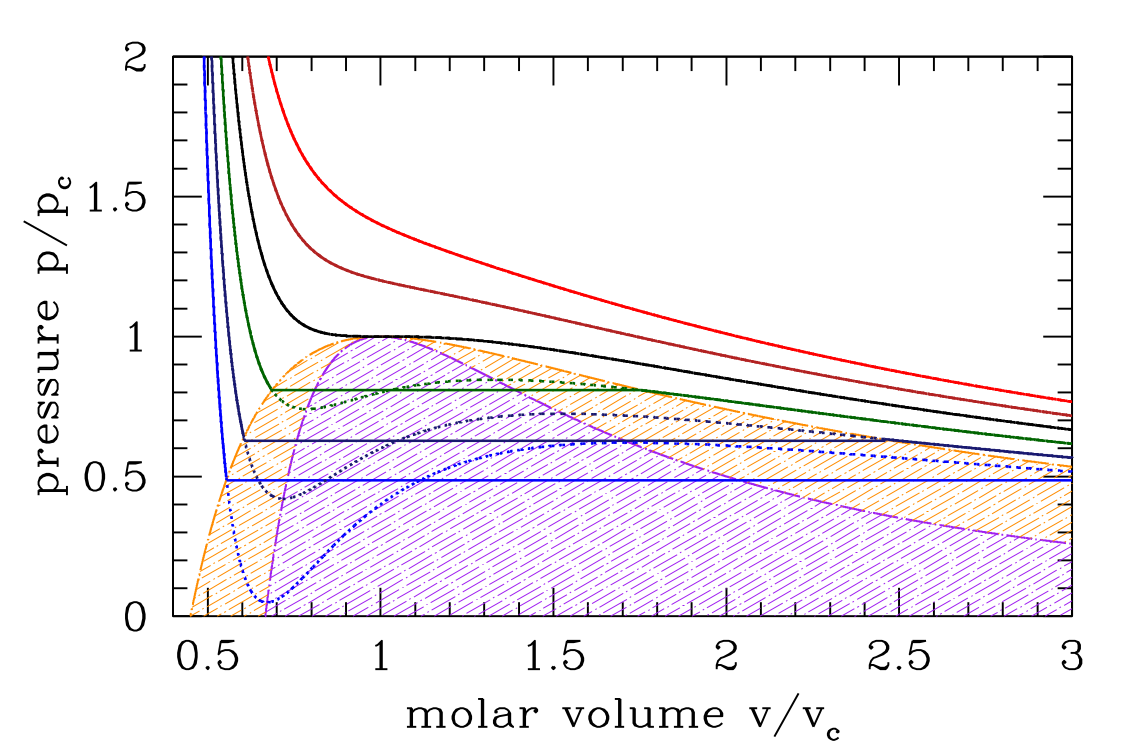

### Expansión de alta $T$ en el modelo de Ising

La función de partición del modelo de Ising general
$H=-J\sum_{\langle i,j\rangle} \sigma_i \sigma_j$ se puede desarrollar para temperaturas grandes, $\beta\to 0$, como

$$Z= \sum_{\sigma_1,\dots,\sigma_N} e^{-\beta H}
\approx \sum_{\sigma_1,\dots,\sigma_N} [1-\beta H+\beta^2 H^2/2+\dots]
$$

y cada una de las sumas es ahora mas fácil. De hecho, cada término es un valor medio con un hamiltoniano trivial $H=0$, es decir correspondiente al sistema no interactuante. También podríamos haber escrito $H=H_0+H_{int}$ donde $H_0$ es trivial aunque no cero, y $\beta H_{int} \ll 1$.

$$Z= \sum_{\sigma_1,\dots,\sigma_N} e^{-\beta H}
\approx \sum_{\sigma_1,\dots,\sigma_N} e^{-\beta H_0} [1-\beta H_{int}+\beta^2 H_{int}^2/2+\dots]
$$


Asi que en principio podemos hacerlo.

Sin embargo, es mucho mejor planificar la expansión de otra manera, como hicimos ya en el caso de las partículas.
Para eso tenemos antes que resolver el siguiente ejercicio:

$$e^{K\sigma_i \sigma_j}=
\frac{e^K+e^{-K}}{2}+\frac{e^K-e^{-K}}{2}\sigma_i\sigma_j
=\cosh(K)(1+t \sigma_i \sigma_j)$$

con $t=\tanh(K)$.
Esto implica que

$$Z=\sum_{\sigma_1,\dots,\sigma_N}
e^{\beta J\sum_{\langle i,j\rangle} \sigma_i \sigma_j}
= \sum_{\sigma_1,\dots,\sigma_N} \prod_{\langle i,j\rangle} \cosh(\beta J)(1+t \sigma_i \sigma_j)
=  \cosh(\beta J)^{N_b}  \sum_{\sigma_1,\dots,\sigma_N}\prod_{\langle i,j\rangle} (1+t \sigma_i \sigma_j)
$$

donde $N_b$ es el número de bonds en la red (hacer un dibujito). Por ejemplo, si un espín tiene $z$ vecinos, habrán $N_b=Nz/2$ bonds, donde $z$ depende de la dimension $d$ y la topología de la red. Para una red cuadrada en $d=2$, $z=4$.
Para una red cúbica en $d=3$, $z=6$. Para $d=1$, $z=2$, asi que parece que $z=2d$ para redes cuadradas y $N_b=Nd$ en las mismas.

El desarrollo entonces no es en $\beta$ sino en $t=\tanh(\beta J)$, que también es pequeño. Parece muy complicado el desarrollo, del estilo

$$Z=\sum_{\sigma_1,\dots,\sigma_N} \cosh(\beta J)^{N_b}
(1+t \sigma_1 \sigma_2)(1+t \sigma_1 \sigma_3)\dots (1+t \sigma_2 \sigma_3)\dots$$

y asi, con un monton de $(\dots)$ correspondientes a cada par de espines vecinos. Es de esperar entonces que nos queden cosas como

$$1, t\sigma_i \sigma_{j(i)}, \dots, t^2 \sigma_i \sigma_{j(i)} \sigma_k \sigma_{l(k)},\dots$$

lo interesante es que, si los sitios no forman un loop, cuando
los sume con $\sum_{\sigma_1,\dots,\sigma_N}$ me van a dar cero!!
Piensen ejemplos... En cada término, cada espin debe aparecer a una potencia par, y cuando lo sume me dara un factor $2$, asi que al final siempre hay un
$2^N=2^{\text{espines en el grafo}}2^{N-\text{espines en el grafo}}$ acompañando a cada $t^{\text{#bonds en el grafo}}$. Esto es maravilloso porque

$$Z=2^N \cosh(J\beta)^{N_b} \sum_{\text{grafos cerrados}} t^{\text{#bonds en el grafo}}$$

#### Red hypercúbica
Si particularizamos a la red hypercubica (notar que hasta aqui es cualquier red) el grafo cerrado mas chico es un cuadradito con $d(d-1)/2$ orientaciones ($d=3$ seria que este en el plano X-Y, en el X-Z, o en el Y-Z, $d(d-1)/2=3$).
El siguiente tiene 6 bonds, y en un rectangulito de lado $2\times 1$.
Entonces va quedando

$$Z=2^N \cosh(\beta J)^{dN} \left[ 1+ \frac{d(d-1)N}{2}t^4 + d(d-1)(2d-3) t^6 + \dots \right]$$

#### Modelo de Ising unidimensional
Particularicemos para el modelo de Ising en $d=1$. Si fuera abierta la cadena se anulan todos los términos porque no hay grafos cerrados. Pero si consideramos condiciones de contorno periódicas hay exactamente un solo grafo cerrado con $N$ bonds (en $d=1$ hay igual número de sitios que de bonds) asi que hay un $t^N$.

$$Z=2^N \cosh(\beta J)^{dN}[1+t^N]$$

comparemos con la solucion exacta usando la matriz de transferencia

$$Z=
\left[\exp(\beta J)\cosh(\beta \mu B)+
\sqrt{\exp(-2\beta J)+\exp(2\beta J)\sinh^2(\beta \mu B)}\right]^N
$$

que a $B=0$ nos queda

$$Z=\left[\exp(\beta J)+\sqrt{\exp(-2\beta J)}\right]^N
=\left[\exp(\beta J)+\exp(-\beta J)\right]^N =
2^N \cosh(\beta J)^N
$$

le falta el factor $[1+t^N]$, pero como en la solucion exacta ya habiamos tomado el limite termodinámico, y $t=\tanh(\beta J) < 1$, las dos soluciones son idénticas! (de hecho $[1+t^N]$ debe ser $\lambda_2^N$, el autovalor que no nos molestamos en calcular).

Con las expansiones de alta y tambien de bajas temperaturas emergen cosas muy interesantes, como la dualidad, que es una técnica general y muy poderosa encontrada por Kramers y Wannier en 1941.










### Expansión de baja $T$ en el modelo de Ising


La funcion de partición del modelo de Ising general
$H=-J\sum_{\langle i,j\rangle} \sigma_i \sigma_j$ se puede desarrollar para temperaturas chicas, $\beta\to \infty$, agregando por importancia, las excitaciones sobre el estado fundamental, totalmente magnetizado.
Cada nuevo nivel de energía que agregamos tiene su degeneración $\Omega(E)$, que depende de la dimensión $d$ del espacio (suponemos red regular cúbica con $z=2d$ vecinos). Entonces

\begin{align}
Z &= \sum_{\sigma_1,\dots,\sigma_N} e^{-\beta H}
=\sum_{E} \Omega(E) e^{-\beta E} \\
&= 2e^{\beta J N d}[ 1 + N e^{-4d \beta J} +
dNe^{-4(d-1)\beta J} +
\frac{N(N-2d-1)}{2}e^{-8d\beta J}+ \dots] \\
&\approx  
e^{\beta J N d} \sum_{\text{gotitas -}} e^{-2\beta K (\text{perimetro gota})}
\end{align}

* El primer término es el estado fundamental, con energía $E_0=-Jz N/2 = -JNd$.

* El segundo término es la primer excitación. Corresponde a dar vuelta un solo espín, y tiene una energía $E_1=E_0 + 4d \beta J$, y $\Omega(E_1)=N$ pues ese spin puede estar en cualquier sitio.

* El tercer término son dímeros. El costo del diméro es tal que $E_2=E_0+4(d-1)\beta J$. Podemos ubicarlos en cualquier sitio de la red con dos orientaciones posibles, por eso $\Omega(E_2)=dN$.

* El cuarto corresponde a dos espines flipeados pero desconectados.

* Etc...

